# __Cleaning Method 1__
## Normalization -> Z-Score -> 3 STD

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data = pd.read_csv('../Capstone/Data/FirstClean_NHL_Skater_Data.csv')

## Normalization
__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [3]:
data.skew()

Age          0.597643
GP          -0.236011
G            1.865650
A            1.566721
PTS          1.536354
PlusMinus    0.611449
PIM          2.359905
PS           1.406828
EV           1.736286
PP           2.601965
SH           4.358958
GW           2.182919
S            1.074811
TOI          0.343558
BLK          1.731992
HIT          1.449155
FOW          2.855066
FOL          2.633159
EVa          1.337002
PPa          2.430644
SHa          3.874585
S%           3.828148
FO%          0.035270
dtype: float64

**_Applying the yeojohnson normalization method actually increased the skew in my data, therefore I removed the cells_**

In [4]:
data.dtypes

Player        object
Age            int64
Tm            object
Pos           object
GP             int64
G              int64
A              int64
PTS            int64
PlusMinus      int64
PIM          float64
PS           float64
EV             int64
PP             int64
SH             int64
GW             int64
S              int64
TOI          float64
ATOI          object
BLK          float64
HIT          float64
FOW          float64
FOL          float64
Season        object
EVa          float64
PPa          float64
SHa          float64
S%           float64
FO%          float64
dtype: object

In [5]:
data.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM',
       'PS', 'EV', 'PP', 'SH', 'GW', 'S', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW',
       'FOL', 'Season', 'EVa', 'PPa', 'SHa', 'S%', 'FO%'],
      dtype='object')

## Z Score

In [6]:
#Separate the numeric columns from the rest of the data
data_num=data.drop(['Player','Pos','Tm','Season', 'ATOI'], axis=1)

In [7]:
data_num.columns

Index(['Age', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM', 'PS', 'EV', 'PP',
       'SH', 'GW', 'S', 'TOI', 'BLK', 'HIT', 'FOW', 'FOL', 'EVa', 'PPa', 'SHa',
       'S%', 'FO%'],
      dtype='object')

In [8]:
data_objects=data.drop(['Age', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM', 'PS', 'EV', 'PP',
       'SH', 'GW', 'S', 'TOI', 'BLK', 'HIT', 'FOW', 'FOL', 'EVa', 'PPa', 'SHa',
       'S%', 'FO%'], axis=1)

In [9]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_num = scaler.fit_transform(data_num)
data_num_zs = pd.DataFrame(data_num)

In [10]:
data_num_zs.columns=['Age', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM', 'PS', 'EV', 'PP',
       'SH', 'GW', 'S', 'TOI', 'BLK', 'HIT', 'FOW', 'FOL', 'EVa', 'PPa', 'SHa',
       'S%', 'FO%']

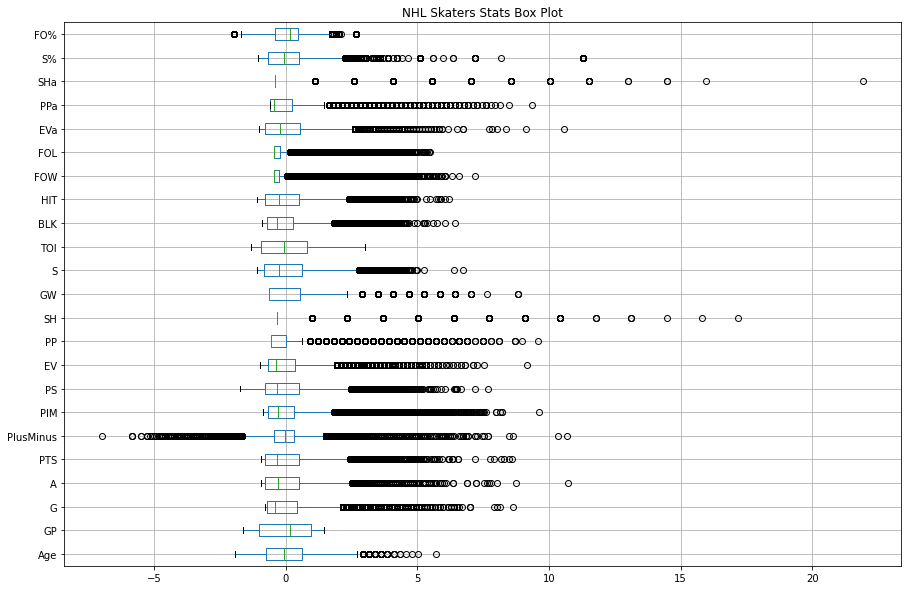

In [11]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NHL Skaters Stats Box Plot')
plt.show()

**_The data clearly has not been scaled correctly. Lets see what 3 STD does_**

## 3 STD

In [12]:
for col in data_num_zs.columns:
    u_bound = data_num_zs[col].mean() + 3* data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] > u_bound] = u_bound

In [13]:
for col in data_num_zs.columns:
    l_bound = data_num_zs[col].mean() - 3*data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] < l_bound] = l_bound

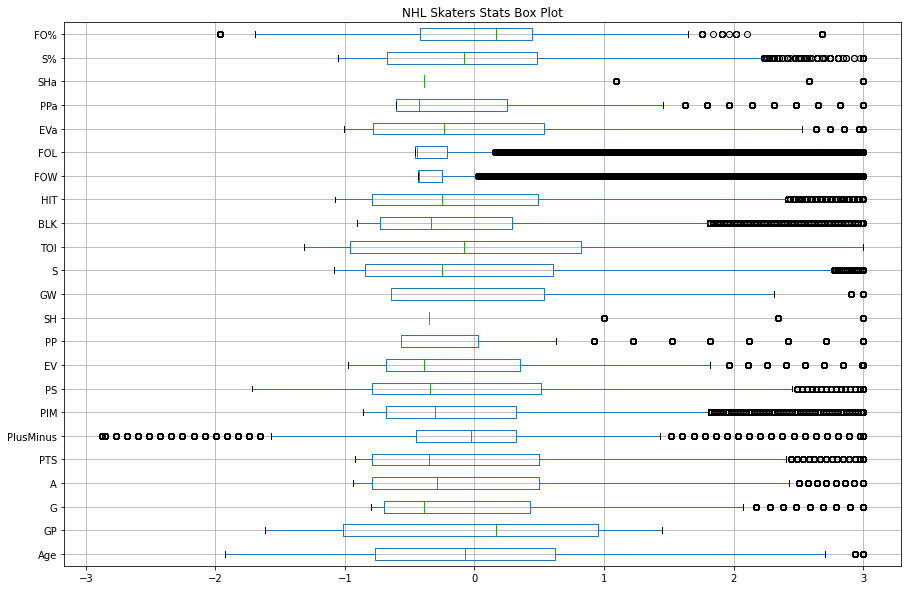

In [14]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NHL Skaters Stats Box Plot')
plt.show()

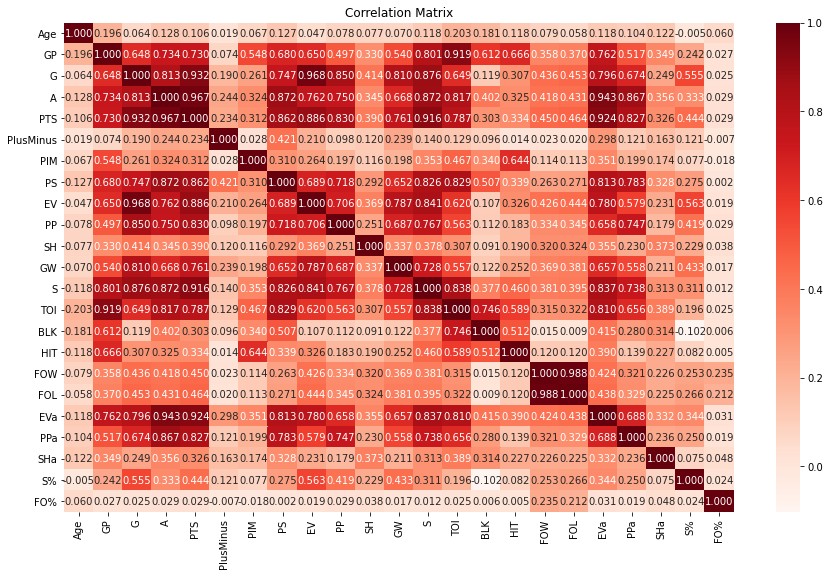

In [15]:
corr = data_num_zs.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [17]:
NHL_Spipeline1=pd.concat([data_num_zs, data_objects], axis=1)

In [18]:
NHL_Spipeline1.head()

,Age,GP,G,A,PTS,PlusMinus,PIM,PS,EV,PP,...,EVa,PPa,SHa,S%,FO%,Player,Tm,Pos,ATOI,Season
0,1.316657,0.129322,-0.800412,-0.720262,-0.791998,-1.139098,-0.304749,-1.161684,-0.826699,-0.569227,...,-0.675084,-0.603173,-0.392775,-1.057199,0.596335,Justin Abdelkader,DET,LW,11:32,2019-20
1,-0.071884,-1.440610,-0.800412,-0.863466,-0.880709,0.061544,-0.859863,-0.826250,-0.826699,-0.569227,...,-0.895744,-0.603173,-0.392775,-1.057199,NaN,Pontus Aberg,TOR,LW,8:42,2019-20
2,-1.229000,-1.547651,-0.697750,-0.935067,-0.880709,0.061544,-0.815454,-0.751709,-0.679888,-0.569227,...,-1.006075,-0.603173,-0.392775,3.000035,NaN,Vitaly Abramov,OTT,RW,5:47,2019-20
3,0.390963,0.735886,1.252831,-0.433855,0.272525,0.233064,-0.393567,0.254593,1.962706,-0.569227,...,-0.233763,-0.603173,-0.392775,1.225031,0.261586,Noel Acciari,FLA,C,15:58,2019-20
4,0.622387,-0.834046,-0.697750,-0.791864,-0.791998,0.318824,-0.771045,-0.714438,-0.679888,-0.569227,...,-0.785414,-0.603173,-0.392775,0.176439,0.391766,Andrew Agozzino,TOT,LW,7:21,2019-20


In [20]:
NHL_Spipeline1.to_csv('../Capstone/Data/NHL_Spipeline1.csv', index=0)